Here, we are leveraging a few basic machine learning concepts to predict you the best selling price for their home using the Boston Housing dataset from scikit-learn learn python library. The dataset contains aggregated data on various features for houses in Greater Boston communities, including the median value of homes for each of those areas. The goal is to build an optimal model based on a statistical analysis with the tools available. This model will then used to estimate the best selling price for your client's home.

## Importing the necessary libraries and loading the data

In [1]:
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

# A sample client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

city_data = datasets.load_boston()

housing_prices = city_data.target
housing_features = city_data.data

## Statistical Analysis and Data Exploration

In [2]:
total_houses = len(housing_prices)
total_features = housing_features.shape[1]
minimum_price = min(housing_prices)
maximum_price = max(housing_prices)
mean_price = np.mean(housing_prices)
median_price = np.median(housing_prices)
std_dev = np.std(housing_prices)


print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


## Evaluating Model Performance
We will start with developing the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

First, we need to split the data into training and testing sets so that we develop the model using the training set and then measure the performance of the model using an out of sample set (the test test). Also, the testing dat provides us with better insights about whether we are overfitting or under fitting (variance and bias). We must always split the data into training and test sets unless our data contains all the population.

In [3]:
# Put any import statements you need for this code block here

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data
    from sklearn.cross_validation import train_test_split

    X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=.3,random_state=0)
    
    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test

In [4]:
X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)


For a classifier model where the target values are labeled data, the first four metrics would be appropriate. however, the target values of our data `housing_prices` are numerical ones and therefore a regression model would be suitable choice. For regression models, the MSE or MAE would be the appropriate ones to use. Both of two metrics measures the relative distance of the predicted values from the actual values. The two formulas of those two metrics are:

$$MSE=\frac { 1 }{ n } \sum _{ i=1 }^{ n }{ { ({ y }_{ predicted }-{ y }_{ actual }) }^{ 2 } } \\ MAE=\frac { 1 }{ n } \sum _{ i=1 }^{ n }{ \left| { y }_{ predicted }-{ y }_{ actual } \right|  } $$

Because the MSE takes the square distance instead of taking the absolute one in MAE, it penalizes extreme values more than the MAE does. Therefore, for this project I will go for the MSE. 


In [5]:
def performance_metric(y_true,y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    from sklearn.metrics import mean_squared_error
    error = mean_squared_error(y_true,y_predict)
    return error

In the final step, we will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as above. 
- Build a grid search algorithim using `regressor`, `parameters`, and `scoring_function` with cross-validation. 

Grid search algorithm is brute force solution for choosing the optimal hyper-parameters to select the best model. It is applicable when we have a range of values for each hyper-parameter and we would like to find a combination of those values that will result the best performance scores. 

Cross-validation is a method used for evaluate the generalized performance of the model and fine tuning hyperparameters. There are many different methods for cross validation. One popular choice is dividing the data into training set, validation set and testing set (a 60%, 20%, 20% split for example). However, since our data is not big enough, using this method will take out valuable data that could be used to train the model. Therefore, a better method in this situation would be K-fold cross validation where it matters less how the data gets divided.  In the case of K-fold cross validation, the training set is divided into K equal sized folds. Then, a single fold is hold out and treated as a validation data, the remaining K-1 folds are used for the training the model and then the trained model is tested on the validation data (the excluded fold). The process is repeated K times and than the average error across all the fold is computed. A pseudocode for the process is summarized below: 
```
Divide the data into K folds. 
for `i=i:K`:
	Train the model on the data exluding fold `i`.
	Test the trained model on fold `i`
	Compute the error
Return the average error.
```
Moreover, cross-validation is helpful when using grid search over a set of hyperparameters because ensure the model does not overfit its data by tuning. Grid search exhaustively searches through a manually specified subset of hyperparameter space of a learning algorithm. Then, the resulting models are evaluated using cross-validation. 

In [6]:
def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    from sklearn.metrics import make_scorer
    scoring_function = make_scorer(performance_metric, greater_is_better=False)

    # Make the GridSearchCV object
    from sklearn import grid_search
    reg = grid_search.GridSearchCV(regressor, parameters, cv=10, scoring=scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_

In [16]:
fit_model(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

## Analyzing Model Performance
Here w'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, we'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing the model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

In [7]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [8]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


/Users/ahmadmohammad/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


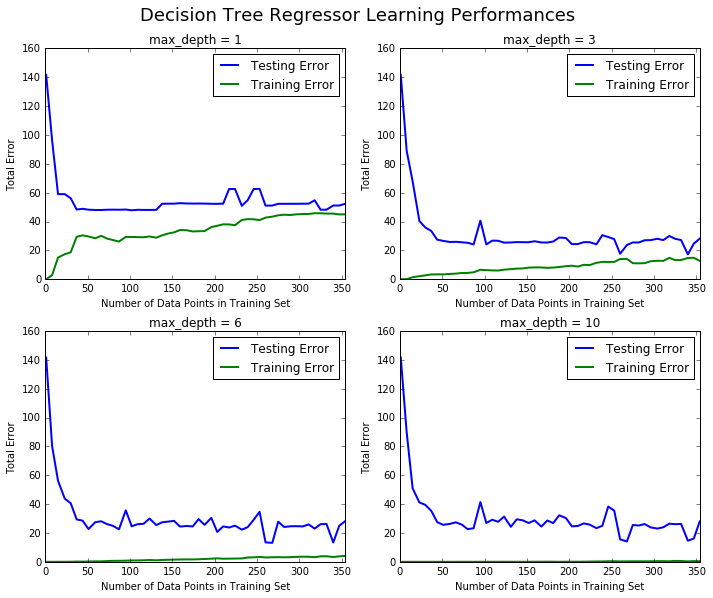

In [9]:
learning_curves(X_train, y_train, X_test, y_test)

Let's take the graph with depth 1 for example. The training error when the size of the training set is small is small since there is less variance to accommodate, while the testing error is high since the model hasn't been trained with enough examples. As the size increases, the training error starts to increase. If the model is underfiting, the increase will be high and if it is overfitting, the increase will be low. our chosen curve clearly indicates that the model is underfitting since the increase in the training error is high when the size increases. The testing error decreases as the size increases since now the model is better trained with more training example.

Creating a model complexity graph. . . 


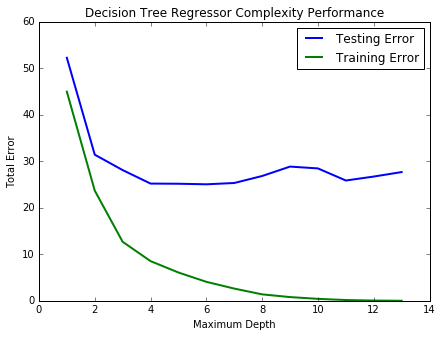

In [10]:
model_complexity(X_train, y_train, X_test, y_test)

As the model complexity increases, the model go through two stages. The first stage is when the model complexity is small. In this stage, the model suffers from a high bias (underfitting) and both the training and testing errors are high. The second stage is when the model complexity is high. Here the model suffers from high variance (overfitting) where the training error is low and the testing error is high. Therefore, the max depth that will best generalizes the dataset is the one which the training error is low and testing error is at global minimum. According to the curve above, this would be around a depth of 5 or 6.

## Model Prediction
Finally, we will make a prediction on the sample feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. Here, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 

In [11]:
reg = fit_model(housing_features, housing_prices)

In [12]:
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']

Final model has an optimal max_depth parameter of 7


According to optimized model, the maximum depth would be 5. This is not far from my initial tuition since the learning curves with depth of 3 and 6 above indicate that the best model would be somewhere between them. That is because those two models have small errors and have the smallest gaps between the two errors. Now let's predict the house price using the optimized model.

In [13]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 19.997


According to out trained model, the best selling price would be $20,968, which is close of the mean housing prices in Boston and within one standard deviation from the mean. We could also find the nearest neighbours of the feature vector and see how our result compares with them. 

In [14]:
from sklearn.neighbors import NearestNeighbors
def find_nearest_neighbor_indexes(x, X):  # x is your vector and X is the data set.
   neigh = NearestNeighbors( n_neighbors = 10 )
   neigh.fit( X)
   distance, indexes = neigh.kneighbors( x )
   return indexes
indexes = find_nearest_neighbor_indexes(CLIENT_FEATURES, housing_features)
sum_prices = []
for i in indexes:
    sum_prices.append(city_data.target[i])
neighbor_avg = np.mean(sum_prices)
print "Nearest Neighbors average: " +str(neighbor_avg)

Nearest Neighbors average: 21.52


According to the learning curves above, there is still a small gap between the train and testing error due to over fitting. Therefore, we still must improve the model. One way would be collecting more data. Note that collecting more data does not necessarily solve the over fitting problem. Or perhaps we need to select smaller set of features. Also, perhaps the outliers in our data are affecting the model's performance. The histogram below clearly shows that there are somee extreme outliers in our `housing_prices` data. 


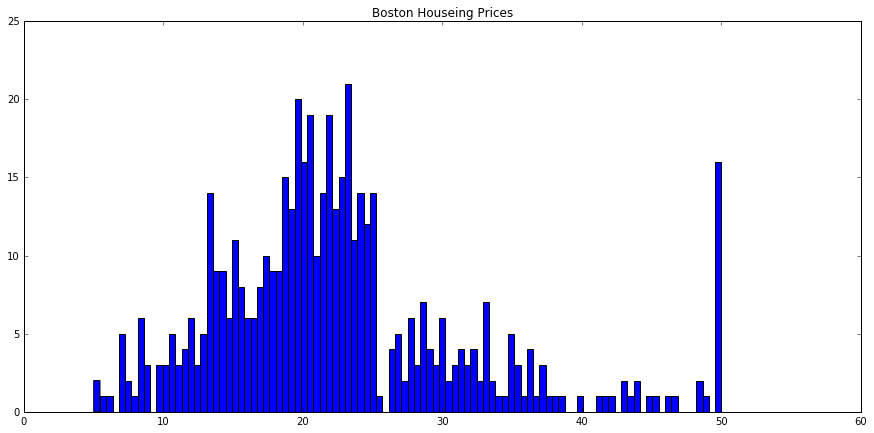

In [80]:
pl.figure(figsize=(15, 7))
pl.title('Boston Houseing Prices')
pl.hist(housing_prices,bins=100)
pl.show()